<a href="https://colab.research.google.com/github/MoonlightO2/Our-World-in-Data/blob/main/The_age_specific_death_rates_from_COPD_(USA_%26_Uganda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The age-specific death rates from Chronic Obstructive Pulmonary Disease (COPD) in both the United States of America (USA) & Uganda in 2019**
***Assessment URL***: https://owid.notion.site/owid/Data-analysis-exercise-Our-World-in-Data-Junior-Data-Scientist-application-ab287a3c07264b4d91aadc436021b8c0

***Job Advertisement***: https://uk.indeed.com/viewjob?jk=afc4c99438be80c5

## **Calculations**
Report attached in word (.docx & .pdf)

### **Population data for 2019 (in thousands)**

In [27]:
us_population = 329227
uganda_population = 44270

### **Age-specific death rates from chronic obstructive pulmonary disease (COPD) in 2019**

In [28]:
# Format: (Age Group, US Rate, Uganda Rate)
age_specific_death_rates = [
    ('0-4', 0.1, 15.5),
    ('5-9', 0.1, 4.8),
    ('10-14', 0.1, 2.4),
    ('15-19', 0.2, 3.7),
    ('20-24', 0.3, 3.5),
    ('25-29', 0.4, 3.3),
    ('30-34', 0.6, 3.1),
    ('35-39', 0.9, 2.9),
    ('40-44', 1.4, 2.7),
    ('45-49', 2.1, 3.0),
    ('50-54', 3.3, 3.7),
    ('55-59', 5.0, 4.6),
    ('60-64', 7.6, 5.9),
    ('65-69', 11.4, 7.8),
    ('70-74', 17.1, 10.7),
    ('75-79', 26.1, 15.1),
    ('80-84', 41.5, 22.0),
    ('85+', 73.6, 32.9)
]

### **WHO Standard Population**

In [29]:
# Age group weights (0-1, 1-4, 5-9, ..., 85+)
# Values are taken from WHO Standard Population
standard_population = {
    '0-4': 5022,
    '5-9': 4704,
    '10-14': 4425,
    '15-19': 4416,
    '20-24': 4453,
    '25-29': 4416,
    '30-34': 4176,
    '35-39': 3817,
    '40-44': 3512,
    '45-49': 3225,
    '50-54': 2843,
    '55-59': 2387,
    '60-64': 1948,
    '65-69': 1556,
    '70-74': 1214,
    '75-79': 873,
    '80-84': 547,
    '85+': 292
}

In [30]:
# Function to calculate crude death rate
def calculate_crude_death_rate(death_rates, population):
    total_deaths = sum(rate for _, rate, _ in death_rates)  # Updated here to unpack three values
    crude_death_rate = (total_deaths / population) * 100000
    return round(crude_death_rate, 1)

# Function to calculate age-standardised death rate
def calculate_age_standardised_death_rate(death_rates, population, standard_population):
    weighted_rates = []
    for age_group, rate, _ in death_rates:  # Updated here to unpack three values
        weighted_rate = (rate / population) * standard_population[age_group]
        weighted_rates.append(weighted_rate)
    age_standardised_death_rate = sum(weighted_rates) * 100000
    return round(age_standardised_death_rate, 1)

# Calculate and print results
us_crude_death_rate = calculate_crude_death_rate(age_specific_death_rates, us_population)
uganda_crude_death_rate = calculate_crude_death_rate(age_specific_death_rates, uganda_population)

us_age_standardised_death_rate = calculate_age_standardised_death_rate(age_specific_death_rates, us_population, standard_population)
uganda_age_standardised_death_rate = calculate_age_standardised_death_rate(age_specific_death_rates, uganda_population, standard_population)

# Output results
print("Crude Death Rate (per 100,000 people) for 2019:")
print(f"USA: {us_crude_death_rate}")
print(f"Uganda: {uganda_crude_death_rate}")

print("\nAge-standardised Death Rate (per 100,000 people) for 2019:")
print(f"USA: {us_age_standardised_death_rate}")
print(f"Uganda: {uganda_age_standardised_death_rate}")

Crude Death Rate (per 100,000 people) for 2019:
USA: 58.3
Uganda: 433.3

Age-standardised Death Rate (per 100,000 people) for 2019:
USA: 50004.2
Uganda: 371871.0


## **Plots**

In [31]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Extracting data for plotting
age_groups = [age_group for age_group, _, _ in age_specific_death_rates]
us_death_rates = [us_rate for _, us_rate, _ in age_specific_death_rates]
uganda_death_rates = [uganda_rate for _, _, uganda_rate in age_specific_death_rates]

### **Plotting Age-specific Death Rates**

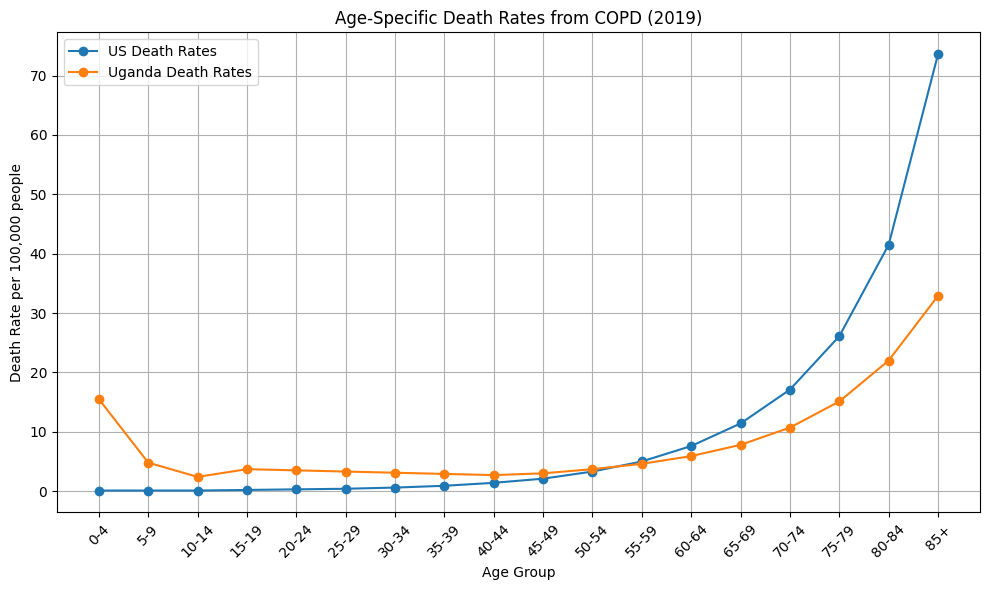

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(age_groups, us_death_rates, label='US Death Rates', marker='o')
plt.plot(age_groups, uganda_death_rates, label='Uganda Death Rates', marker='o')
plt.title('Age-Specific Death Rates from COPD (2019)')
plt.xlabel('Age Group')
plt.ylabel('Death Rate per 100,000 people')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Data for plotting
countries = ['United States', 'Uganda']
crude_death_rates = [us_crude_death_rate, uganda_crude_death_rate]
age_standardised_death_rates = [us_age_standardised_death_rate, uganda_age_standardised_death_rate]

### **Plotting crude death rates and age-standardised death rates**

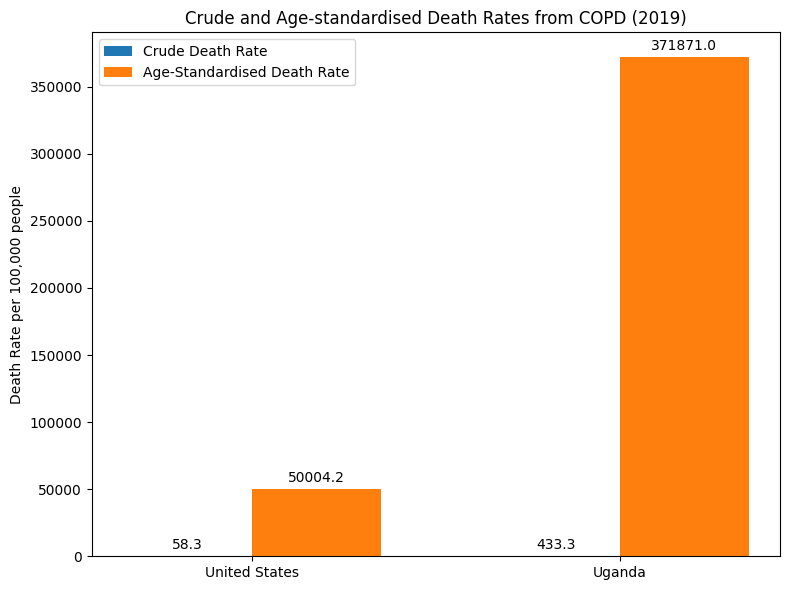

In [37]:
x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, crude_death_rates, width, label='Crude Death Rate')
rects2 = ax.bar(x + width/2, age_standardised_death_rates, width, label='Age-Standardised Death Rate')

ax.set_ylabel('Death Rate per 100,000 people')
ax.set_title('Crude and Age-standardised Death Rates from COPD (2019)')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()